In [1]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

from sklearn import model_selection as mdsel
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#let us import our training data..for which we can train and evaluate the model
met=pd.read_csv('train_dataset.csv')

In [4]:
#beginning data exploration and cleaning if necessary
met.shape

(3280, 33)

In [5]:
met.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,26.6,0.012722,0.028447,12.721988,28.447230,0.007905,0.017676,41.738807,93.330809,7.648194,...,7.583001,347.475804,443.098049,0.890218,245.671594,1.384692,2.457846e+06,125.647826,0.812461,0
1,22.7,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,19.142824,...,4.710039,176.203926,1107.448956,0.984464,175.628191,3.205210,2.457653e+06,113.100725,0.325071,0
2,24.0,0.042126,0.094198,42.126461,94.197631,0.026176,0.058532,138.210178,309.047354,7.819970,...,11.609153,146.961250,317.222445,0.828952,195.589585,0.991616,2.458100e+06,246.773198,1.134850,0
3,17.7,0.766576,1.714115,766.575574,1714.115092,0.476328,1.065101,2515.011805,5623.737359,2.335267,...,7.012588,354.475923,1036.204307,1.259659,105.208870,2.748343,2.457681e+06,111.130550,0.347422,0
4,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,30.994787,...,60.900589,219.323712,2174.260704,1.277179,218.504766,5.291914,2.458459e+06,284.064157,0.165574,0


In [6]:
#we observe that there are several redundant columns such as estimated diameter,relative velocity and miss distance are given in many different units
#for effective predictions we only need that in one unit
#therefore dropping redundant columns
print(met.columns)

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')


In [8]:
met=met.drop(['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)'],axis=1)
met.shape

(3280, 27)

In [9]:
met=met.drop(['Relative Velocity km per hr','Miles per hour'],axis=1)
met.shape

(3280, 25)

In [10]:
met=met.drop(['Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)'],axis=1)
met.shape

(3280, 22)

In [11]:
#we can also observe that column 'Orbit ID' does not contribute to this prediction
met=met.drop(['Orbit ID'],axis=1)
met.shape

(3280, 21)

In [12]:
#getting a statistical analysis of the data
met.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,...,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,3280.000000,3280.000000
mean,22.287687,0.197258,0.441082,13.920372,3.836033e+07,3.509146,0.082819,5.035063,2.457726e+06,0.380313,...,13.473183,171.349646,638.009022,0.818517,184.229431,1.990773,2.457733e+06,182.515907,0.731585,0.160976
std,2.874909,0.276904,0.619175,7.328379,2.175424e+07,3.080981,0.090752,1.217016,8.986110e+02,0.181697,...,10.946805,103.435107,367.985549,0.240366,103.201339,0.949144,9.234603e+02,107.526383,0.335232,0.367564
min,14.400000,0.001011,0.002260,0.335504,2.660989e+04,0.000000,0.000002,2.196000,2.450870e+06,0.007522,...,0.020987,0.001941,176.557161,0.080744,0.006918,0.803765,2.450854e+06,0.003191,0.140832,0.000000
25%,20.200000,0.033462,0.074824,8.422339,1.994211e+07,0.000000,0.014642,4.050000,2.458000e+06,0.237908,...,5.058736,81.585368,369.144783,0.640433,96.476530,1.273077,2.457813e+06,87.305972,0.455855,0.000000
50%,21.900000,0.110804,0.247765,12.888534,3.951063e+07,3.000000,0.048163,5.066000,2.458000e+06,0.368822,...,10.389875,172.451944,508.070867,0.840137,190.594667,1.620061,2.457975e+06,188.482062,0.708563,0.000000
75%,24.500000,0.242412,0.542051,17.972776,5.742920e+07,6.000000,0.124345,5.988500,2.458000e+06,0.508973,...,19.762841,252.790804,789.724437,1.000085,272.468434,2.447108,2.458110e+06,276.559414,0.975227,0.000000
max,32.100000,3.503926,7.835018,44.633747,7.478160e+07,9.000000,0.477891,9.025000,2.458020e+06,0.960261,...,75.406667,359.905890,2556.242142,1.299832,359.929822,6.104579,2.458822e+06,359.917991,2.039000,1.000000


In [13]:
met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            3280 non-null   float64
 1   Est Dia in KM(min)            3280 non-null   float64
 2   Est Dia in KM(max)            3280 non-null   float64
 3   Relative Velocity km per sec  3280 non-null   float64
 4   Miss Dist.(kilometers)        3280 non-null   float64
 5   Orbit Uncertainity            3280 non-null   int64  
 6   Minimum Orbit Intersection    3280 non-null   float64
 7   Jupiter Tisserand Invariant   3280 non-null   float64
 8   Epoch Osculation              3280 non-null   float64
 9   Eccentricity                  3280 non-null   float64
 10  Semi Major Axis               3280 non-null   float64
 11  Inclination                   3280 non-null   float64
 12  Asc Node Longitude            3280 non-null   float64
 13  Orb

In [14]:
X=met.drop(['Hazardous'],axis=1)
y=met['Hazardous']

In [15]:
#some features have large values and need to be scaled in order to get good results
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,1.500211,-0.666528,-0.666528,-0.856006,-1.751180,0.808584,-0.890872,0.364831,0.305904,-0.896974,-0.513168,-0.538155,1.703029,-0.529751,0.298344,0.595453,-0.638652,0.122334,-0.528956,0.241291
1,0.143440,-0.435598,-0.435598,0.712743,0.762041,0.808584,-0.748117,-1.215505,0.305904,0.824239,1.325593,-0.800643,0.046938,1.275897,0.690496,-0.083357,1.279703,-0.086993,-0.645663,-1.212821
2,0.595697,-0.560322,-0.560322,-0.832562,-1.762053,-1.139144,-0.893733,1.230194,0.305904,-1.601615,-0.949476,-0.170307,-0.235820,-0.871870,0.043420,0.110094,-1.052853,0.397886,0.597687,1.203129
3,-1.596011,2.056328,2.056328,-1.581096,0.675763,-1.139144,2.467111,-1.064292,0.305904,-0.048908,1.151132,-0.590271,1.770716,1.082260,1.835571,-0.765810,0.798283,-0.056609,-0.663988,-1.146139
4,-0.343606,-0.184893,-0.184893,2.330258,1.129674,1.133206,3.295179,-2.333163,0.305904,1.270669,3.610567,4.333195,0.463879,4.175397,1.908470,0.332172,3.478551,0.786539,0.944547,-1.688677


,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,...,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,3280.000000,3280.000000
mean,22.287687,0.197258,0.441082,13.920372,3.836033e+07,3.509146,0.082819,5.035063,2.457726e+06,0.380313,...,13.473183,171.349646,638.009022,0.818517,184.229431,1.990773,2.457733e+06,182.515907,0.731585,0.160976
std,2.874909,0.276904,0.619175,7.328379,2.175424e+07,3.080981,0.090752,1.217016,8.986110e+02,0.181697,...,10.946805,103.435107,367.985549,0.240366,103.201339,0.949144,9.234603e+02,107.526383,0.335232,0.367564
min,14.400000,0.001011,0.002260,0.335504,2.660989e+04,0.000000,0.000002,2.196000,2.450870e+06,0.007522,...,0.020987,0.001941,176.557161,0.080744,0.006918,0.803765,2.450854e+06,0.003191,0.140832,0.000000
25%,20.200000,0.033462,0.074824,8.422339,1.994211e+07,0.000000,0.014642,4.050000,2.458000e+06,0.237908,...,5.058736,81.585368,369.144783,0.640433,96.476530,1.273077,2.457813e+06,87.305972,0.455855,0.000000
50%,21.900000,0.110804,0.247765,12.888534,3.951063e+07,3.000000,0.048163,5.066000,2.458000e+06,0.368822,...,10.389875,172.451944,508.070867,0.840137,190.594667,1.620061,2.457975e+06,188.482062,0.708563,0.000000
75%,24.500000,0.242412,0.542051,17.972776,5.742920e+07,6.000000,0.124345,5.988500,2.458000e+06,0.508973,...,19.762841,252.790804,789.724437,1.000085,272.468434,2.447108,2.458110e+06,276.559414,0.975227,0.000000
max,32.100000,3.503926,7.835018,44.633747,7.478160e+07,9.000000,0.477891,9.025000,2.458020e+06,0.960261,...,75.406667,359.905890,2556.242142,1.299832,359.929822,6.104579,2.458822e+06,359.917991,2.039000,1.000000


<IPython.core.display.Javascript object>


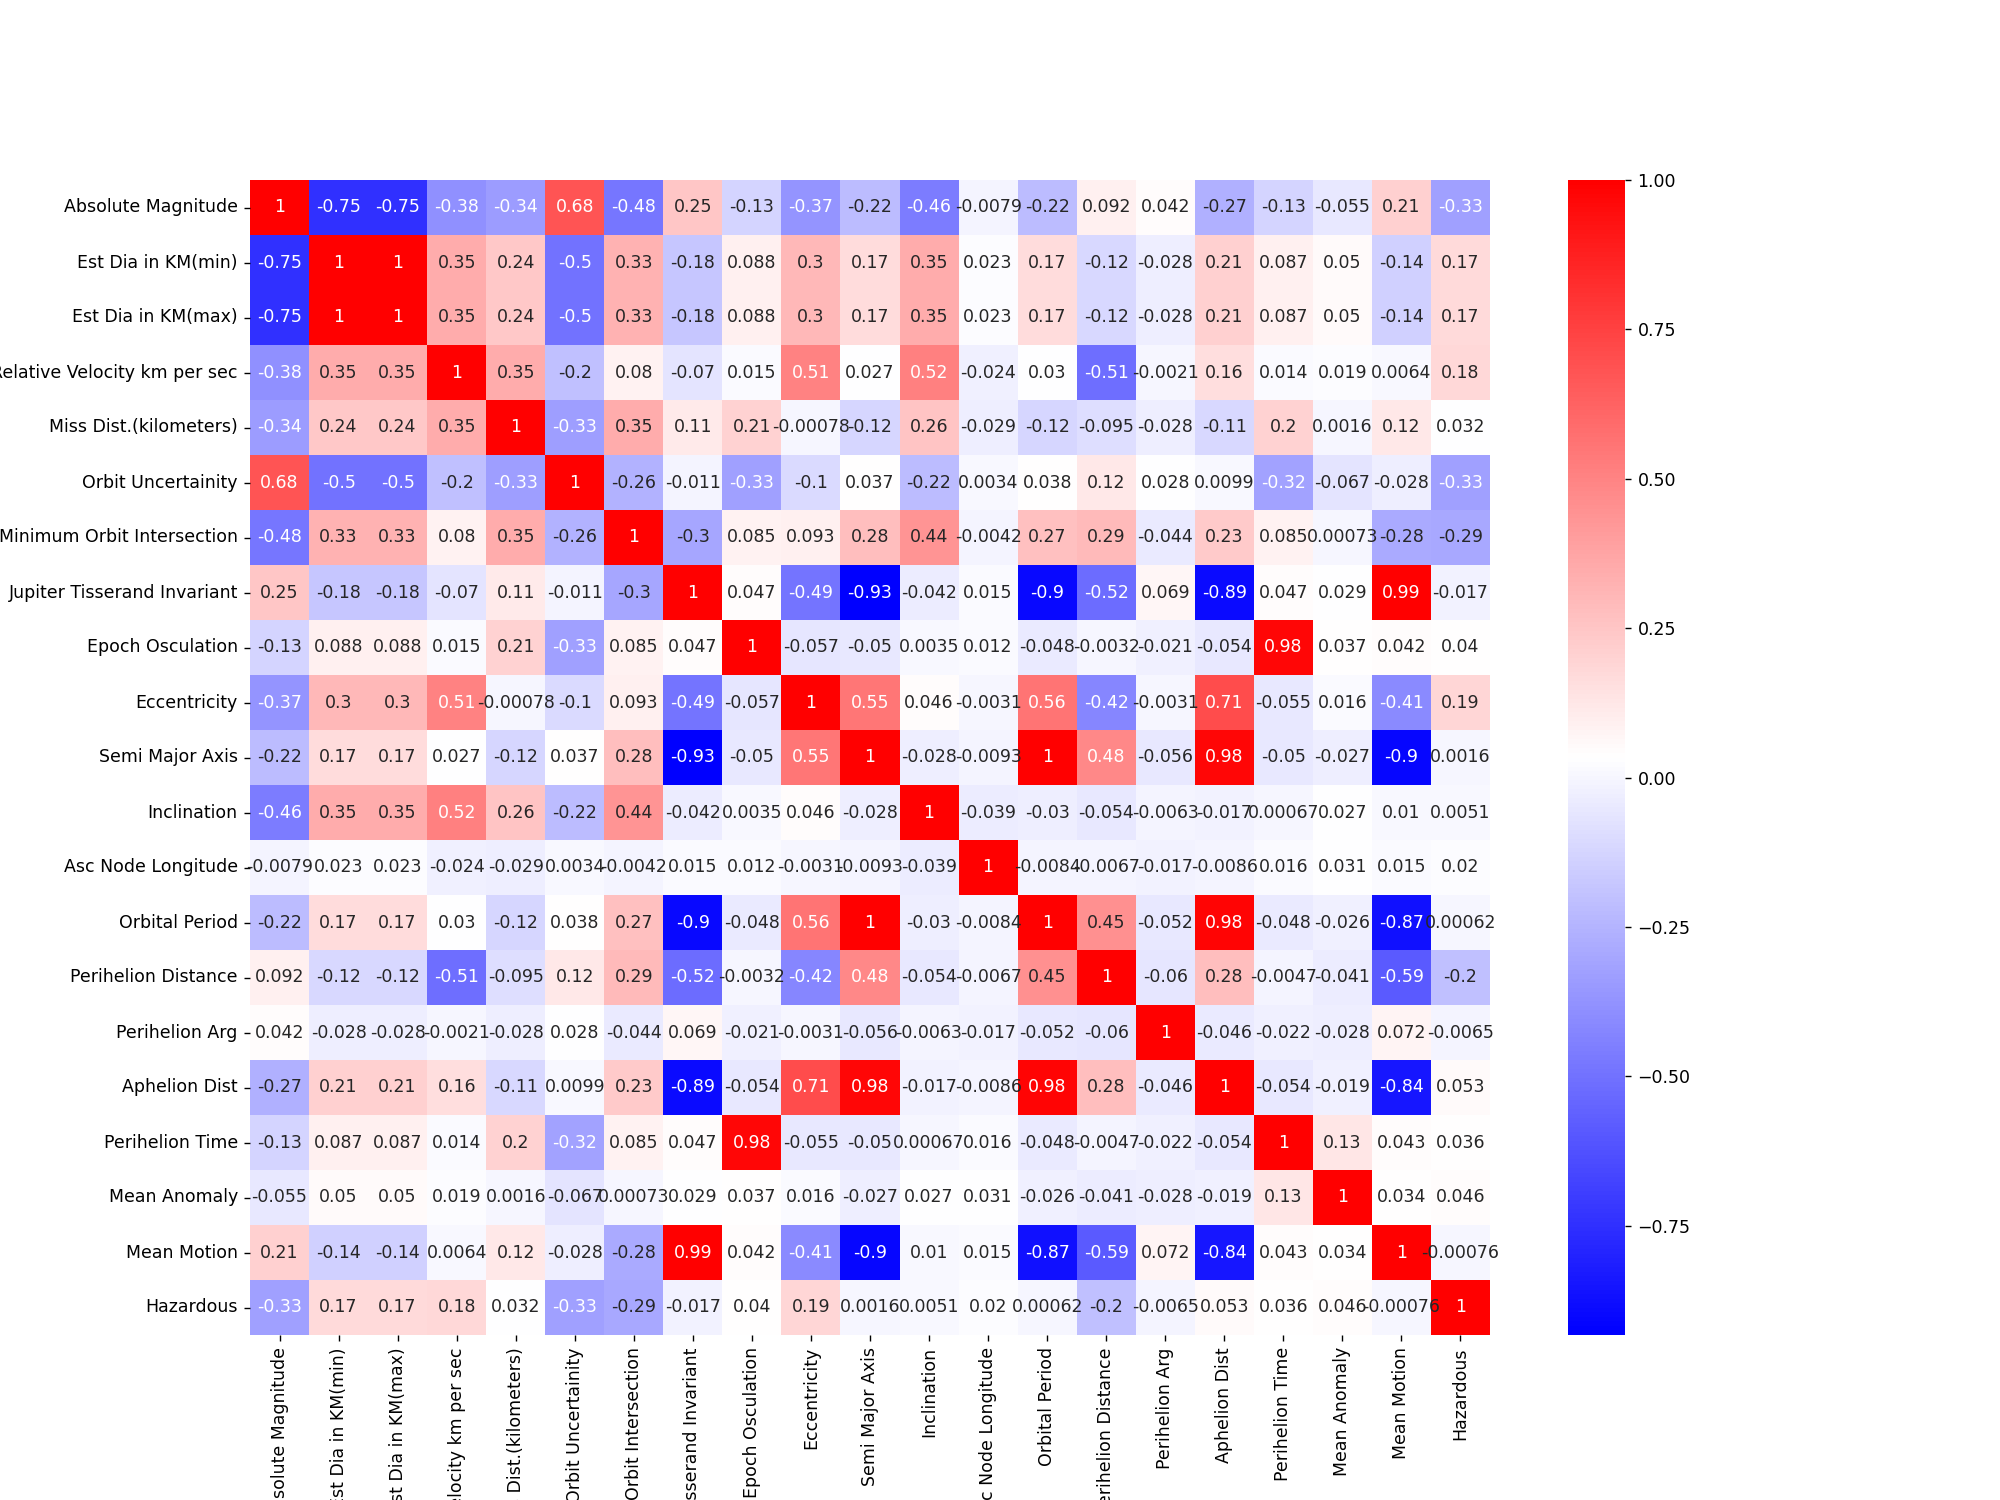

<AxesSubplot:>

In [20]:
#to decide on which model to use we need to check the correlations of the columns with each other and as well as the target
met_corr=met.corr()
plt.figure(figsize=(16,12))
sns.heatmap(met_corr,cmap='bwr',annot=True)

In [66]:
#we observe that target does not have a strong correlation with any of the features, we cannot use logistic regression
#but at the same time all of our data has continuous values, we cannot use naive bayes classifier as well
#also the number of features is high, using random forest model seems the best option
#separating the training data into test and train sets
X_train,X_test,y_train,y_test=mdsel.train_test_split(scaled_features,y,test_size=0.5,random_state=0)
X_train.shape

(1640, 20)

In [67]:
#it is a good practice to reset the indices. Therefore,
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

y_train=y_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,-0.100083,-0.330277,-0.330277,-0.147028,0.725754,0.808584,0.577787,0.576857,0.305904,-0.808068,-0.676064,1.038220,-1.254437,-0.661906,-0.048600,-0.522176,-0.729535,0.333821,1.306054,0.540073
1,-0.900230,0.389803,0.389803,0.815242,0.772372,-1.139144,2.581066,-1.065114,0.305904,-0.297516,0.832327,2.068940,0.311732,0.739696,1.746840,1.268145,0.470930,0.460204,1.072106,-1.002602
2,-0.447973,-0.106730,-0.106730,0.516457,0.431187,-0.814523,2.033752,0.866955,0.305904,0.114469,-0.862053,1.929340,-0.216202,-0.806398,-1.023989,0.146835,-0.686607,0.191858,-0.810202,0.964169
3,-0.204450,-0.273652,-0.273652,-0.577530,-1.449134,-1.139144,-0.436582,-0.140581,0.305904,-0.047825,-0.153779,-0.951481,-1.053169,-0.220667,0.057482,-0.207819,-0.183298,0.405928,1.006212,-0.253761
4,-0.656707,0.086054,0.086054,-0.099722,0.872652,-0.814523,-0.904721,0.179102,0.305904,-1.162868,-0.430370,1.123179,0.666482,-0.460640,0.676021,-0.209725,-0.643443,0.228266,-1.291424,0.109738


In [68]:
#importing the model and fitting it on the training data
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
rfr.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [69]:
#getting predictions on the test dataset
y_pred=rfr.predict(X_test)

In [70]:
#evaluating the accuracy score
accuracy_score(y_pred,y_test)

0.9932926829268293

<IPython.core.display.Javascript object>


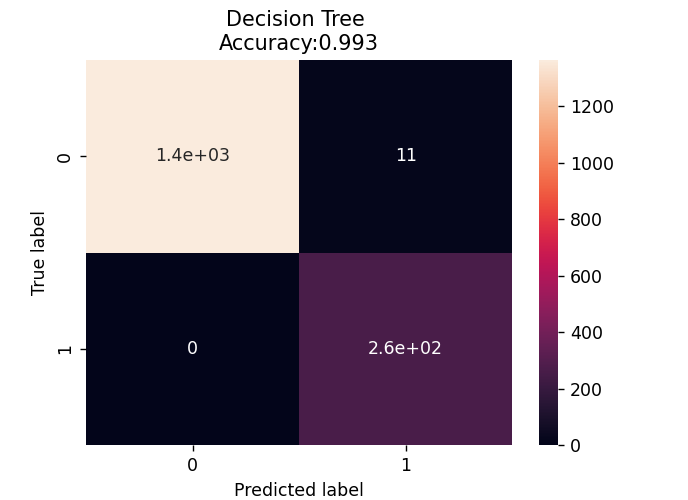

In [71]:
cm=confusion_matrix(y_pred,y_test)
cm_df=pd.DataFrame(cm,index=[0,1],columns=[0,1])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_pred, y_test)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [72]:
#loading the actual test data for which we cannot check the accuracy score as we are not given the values of target
test=pd.read_csv('test_dataset.csv')
test.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,25.1,0.025384,0.056760,25.383703,56.759685,0.015773,0.035269,83.279868,186.219446,4.581412,...,0.960067,6.856692,196.306187,343.597890,0.784560,128.552100,1.135574,2.457956e+06,46.850634,1.047736
1,20.6,0.201630,0.450858,201.629919,450.858206,0.125287,0.280150,661.515505,1479.193637,29.759711,...,1.313190,3.908082,3.756316,549.654306,0.343186,271.386905,2.283193,2.454734e+06,10.117600,0.654957
2,23.7,0.048368,0.108153,48.367649,108.153351,0.030054,0.067203,158.686517,354.833839,8.778408,...,2.829978,5.858230,157.020347,1738.893236,1.011426,344.511853,4.648529,2.458717e+06,211.595601,0.207028
3,18.4,0.555335,1.241767,555.334912,1241.766613,0.345069,0.771598,1821.964991,4074.037573,11.858580,...,1.153596,4.159055,337.201487,452.562947,0.606685,168.443407,1.700507,2.458040e+06,328.724516,0.795469
4,19.3,0.366906,0.820427,366.906138,820.427065,0.227985,0.509790,1203.760332,2691.689932,15.185391,...,1.342777,19.822195,64.003749,568.335056,0.842140,151.941979,1.843415,2.457925e+06,47.816955,0.633429


In [73]:
test.shape

(1407, 32)

In [74]:
#firstly, let us clean the test data
test.info()
#test data has no null values..that is good :D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            1407 non-null   float64
 1   Est Dia in KM(min)            1407 non-null   float64
 2   Est Dia in KM(max)            1407 non-null   float64
 3   Est Dia in M(min)             1407 non-null   float64
 4   Est Dia in M(max)             1407 non-null   float64
 5   Est Dia in Miles(min)         1407 non-null   float64
 6   Est Dia in Miles(max)         1407 non-null   float64
 7   Est Dia in Feet(min)          1407 non-null   float64
 8   Est Dia in Feet(max)          1407 non-null   float64
 9   Relative Velocity km per sec  1407 non-null   float64
 10  Relative Velocity km per hr   1407 non-null   float64
 11  Miles per hour                1407 non-null   float64
 12  Miss Dist.(Astronomical)      1407 non-null   float64
 13  Mis

In [75]:
test=test.drop(['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per hr','Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)','Orbit ID'],axis=1)
test.shape

(1407, 20)

In [76]:
from sklearn.preprocessing import StandardScaler
test_new = StandardScaler().fit_transform(test)
test_new = pd.DataFrame(data=test_new)
test_new.columns= test.columns

# Let's see how the data looks after scaling
test_new.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,0.983194,-0.373886,-0.373886,-1.318719,-0.553990,-0.174213,-0.624931,0.898078,0.290689,-1.155855,-0.808436,-0.576234,0.216424,-0.758032,-0.068649,-0.524664,-0.881012,0.241044,-1.221615,0.819344
1,-0.553931,-0.038275,-0.038275,2.173778,-0.765135,-1.150780,-0.521022,-0.363945,-3.064528,1.977903,-0.144509,-0.846550,-1.655132,-0.212510,-1.866196,0.845684,0.318198,-3.010457,-1.563706,-0.275380
2,0.504978,-0.330120,-0.330120,-0.736551,-1.522994,1.127875,-0.557703,-1.668815,0.290689,1.436347,2.707288,-0.667769,-0.165429,2.935929,0.855293,1.547240,2.789866,1.009628,0.312634,-1.523813
3,-1.305414,0.635256,0.635256,-0.309299,0.378627,-1.150780,-0.170318,0.181374,0.290689,0.486330,-0.444571,-0.823542,1.585905,-0.469554,-0.793065,-0.141949,-0.290683,0.325853,1.403441,0.116245
4,-0.997989,0.276447,0.276447,0.152165,0.857418,-1.150780,0.575828,-0.267346,0.290689,-0.084517,-0.088880,0.612387,-1.069536,-0.163054,0.165854,-0.300263,-0.141350,0.209986,-1.212616,-0.335381


In [77]:
#now this data is ready for making predictions
#now we can make predictions on this data
predictions=(rfr.predict(test_new))

In [78]:
#the the data type of the 'predictions' is a numpy array, we must convert it into a dataframe
predictions_df=pd.DataFrame(predictions)
predictions_df.index=test.index
predictions_df.columns=['Hazardous']
predictions_df.head()

,Hazardous
0,0
1,1
2,0
3,0
4,0


In [79]:
#saving the predictions dataframe as a csv file to be uploaded
predictions_df.to_csv("prediction_results.csv", index = False)